In [2]:
# Variable chargée 'df' à partir de l’URI : /home/mg4/Documents/codeblocks/VS code M1 1er smtre/reseaux connexionnistes/projet2/rice+cammeo+and+osmancik/Rice_Cammeo_Osmancik.csv
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv(r'Rice_Cammeo_Osmancik.csv')

In [3]:
print(df.columns)


Index(['Area Integer ', 'Perimeter Real', 'Major_Axis_Length Real',
       'Minor_Axis_Length Real', 'Eccentricity Real', 'Convex_Area Integer ',
       'Extent Real', 'Class'],
      dtype='object')


In [4]:
df.head()

,Area Integer,Perimeter Real,Major_Axis_Length Real,Minor_Axis_Length Real,Eccentricity Real,Convex_Area Integer,Extent Real,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


In [5]:
from sklearn.preprocessing import  StandardScaler

# Sélection des colonnes numériques
cols_to_normalize =['Area Integer ', 'Perimeter Real', 'Major_Axis_Length Real',
       'Minor_Axis_Length Real', 'Eccentricity Real', 'Convex_Area Integer ',
       'Extent Real']

# Standardization (Z-score scaling)
scaler_standard = StandardScaler()
data_standard = df.copy()
data_standard[cols_to_normalize] = scaler_standard.fit_transform(df[cols_to_normalize])




In [6]:
# Distribution des classes
class_distribution = df['Class'].value_counts()
print(class_distribution)


Class
Osmancik    2180
Cammeo      1630
Name: count, dtype: int64


In [7]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['Class'])


In [8]:
X = df.drop('Class', axis=1)
y = y_encoded

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [10]:
model = Sequential()

# Ajoute la première couche cachée
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Ajoute d'autres couches cachées si nécessaire
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))  # Ajoute du dropout pour éviter le surapprentissage

# Ajoute la couche de sortie
model.add(Dense(1, activation='sigmoid'))  # Utilise 'softmax' pour plus de deux classes


2024-09-01 19:13:41.592026: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [11]:
model.compile(loss='binary_crossentropy',  # Utilise 'categorical_crossentropy' pour plus de deux classes
              optimizer='adam',
              metrics=['accuracy'])


In [12]:
history = model.fit(X_train, y_train, 
                    epochs=50,  # Nombre d'époques d'entraînement
                    batch_size=32, 
                    validation_data=(X_test, y_test))


Epoch 1/50
96/96 [==============================] - 3s 12ms/step - loss: 0.3671 - accuracy: 0.8688 - val_loss: 0.1874 - val_accuracy: 0.9252
Epoch 2/50
96/96 [==============================] - 1s 9ms/step - loss: 0.2141 - accuracy: 0.9193 - val_loss: 0.1728 - val_accuracy: 0.9278
Epoch 3/50
96/96 [==============================] - 1s 11ms/step - loss: 0.2075 - accuracy: 0.9252 - val_loss: 0.1735 - val_accuracy: 0.9252
Epoch 4/50
96/96 [==============================] - 1s 12ms/step - loss: 0.2067 - accuracy: 0.9265 - val_loss: 0.1716 - val_accuracy: 0.9291
Epoch 5/50
96/96 [==============================] - 1s 14ms/step - loss: 0.2015 - accuracy: 0.9265 - val_loss: 0.1710 - val_accuracy: 0.9304
Epoch 6/50
96/96 [==============================] - 1s 13ms/step - loss: 0.2004 - accuracy: 0.9272 - val_loss: 0.1718 - val_accuracy: 0.9278
Epoch 7/50
96/96 [==============================] - 2s 16ms/step - loss: 0.1995 - accuracy: 0.9249 - val_loss: 0.1739 - val_accuracy: 0.9304
Epoch 8/50
96/

In [13]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Seuil pour binariser la sortie

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


24/24 [==============================] - 0s 9ms/step
[[323  27]
 [ 29 383]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       350
           1       0.93      0.93      0.93       412

    accuracy                           0.93       762
   macro avg       0.93      0.93      0.93       762
weighted avg       0.93      0.93      0.93       762



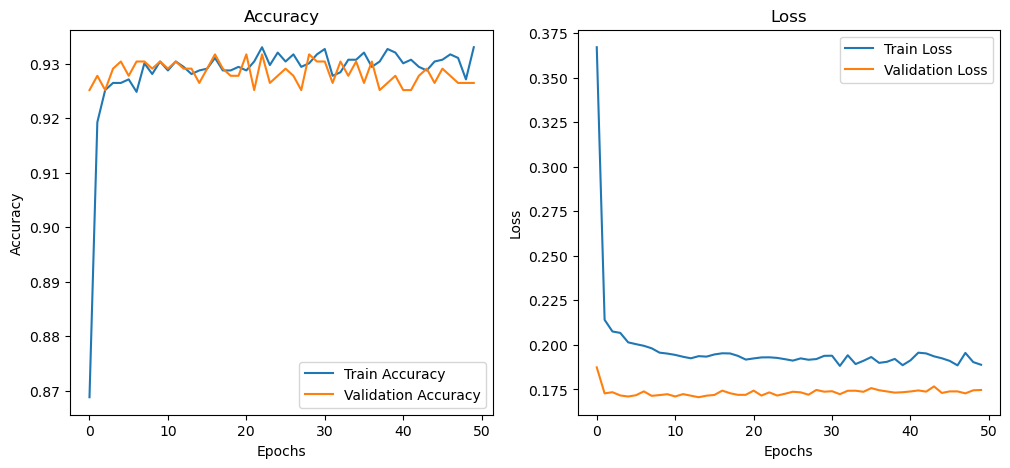

In [15]:
import matplotlib.pyplot as plt

# Plot de la précision
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot de la perte
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


24/24 [==============================] - 0s 4ms/step


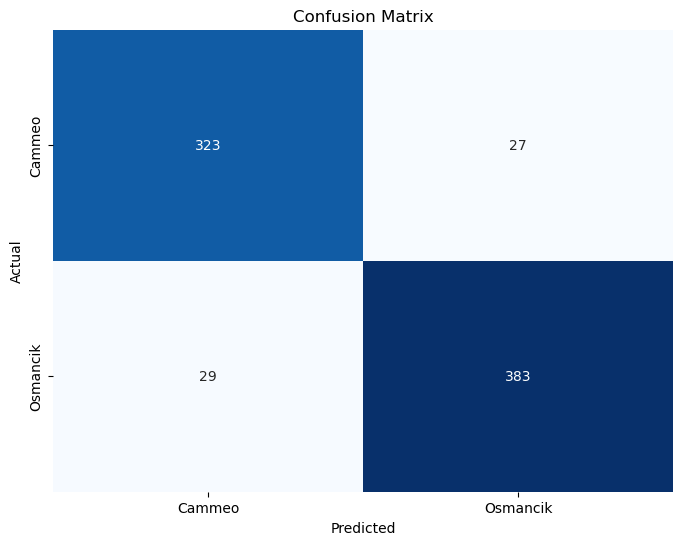

In [18]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Prédictions sur les données de test
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Tracé de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
